------

This is the assignment for the UCL CASA module Data Science for Spatial Systems (CASA0006) 

This is a self contained Jupyter notebook with structure introduction, discussion and embeded code

***Code is hosted [here](https://github.com/Lem-c/DS-reg-vs-nn)***

***Data is availble [here](https://www.gov.uk/government/collections/road-accidents-and-safety-statistics)***

------

# Evaluating Predictive Models: Logistic Regression versus Neural Networks in Traffic Accident Data Analysis

## Abstract

This report analysis the statistics and data about reported collisions and casualties on public roads in Great Britain. With the usage of  logistic regression model applied to a multi-class classification task. The final results shows a better performance of neural network.

------

## Introduction

Neural network has shown highly performance in a lot of fields such as image recongnization, segmentation and clasifcation, etc. In scenarios where the relationship between variables is indeed linear or nearly linear, regression models can perform exceedingly well and are preferred for their simplicity, interpretability, and speed. However, in cases with complex data structures, high dimensionality, and non-linearity, neural networks often outperform regression models.

The task of predicting the accident severity and special conditions at the site of a traffic accident using driving data is pivotal for enhancing road safety and optimizing traffic management. The outcome not only contributes to the theoretical advancements in machine learning but also has practical implications, potentially leading to improved predictive tools that can be integrated into real-time traffic monitoring systems to preemptively identify and mitigate high-risk situations on the road.

This notebook details the process of analyzing and preparing this dataset for predictive modeling, focusing on reducing multicollinearity, merging features, K-fold, PCA and finally compare the prediction accuracy of logistic regresion and NN.



- Requirements: Packages used to run the analysis and global variables

In [5]:
#  Packages for data manipulation and processing
import numpy as np                      # list and matrix calculation
import pandas as pd                     # csv file processing
import copy                             # deep copy an object

# Supervied leraning analysis tools
import torch                                    
import torch.nn as nn                           # neural network moduls
import torch.optim as optim                     # optimizer in NN

from torch.utils.data import TensorDataset, DataLoader # data load related libs
from torch.utils.data import Dataset            # training dataset class
from torch.utils.data import random_split       # randomly split a dataset into multiple subsets

from sklearn.preprocessing import LabelEncoder  # encode target value to label
from sklearn.ensemble import IsolationForest    # advanced outlier detection methods
from sklearn.model_selection import train_test_split # single split dataset
from sklearn.model_selection import KFold       # cross-validation
from sklearn.decomposition import PCA           # PCA for Dimensionality Reduction
# Import logistic regression method
from sklearn.linear_model import LogisticRegression
# Model evaluation tools
from sklearn.metrics import classification_report, accuracy_score      # test accuracy of a model
from sklearn.metrics import confusion_matrix    # calculate numerically to understand the performance

# Data analysis tools
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Calculate vif

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns                   # built-in themes to draw attractive and informative statistical graphics.
from scipy.interpolate import griddata  # Used to Interpolate z values on the grid

## Literature Review

Predictive modeling in traffic accident analysis is crucial for enhancing road safety and preventing severe outcomes. By analyzing patterns and predictors of accidents, researchers can propose measures to reduce accident rates and their severity and it also can make the dispatch of medical resources more rational and funny. This review focuses on two primary predictive models: logistic regression and neural networks, each playing a pivotal role in traffic safety research.

Logistic regression is widely used in traffic accident severity analysis due to its effectiveness in handling binary outcomes. According to Al-Ghamdi (2002), logistic regression was applied to accident-related data to examine the contribution of various variables to accident severity, with the severity classified into fatal and non-fatal outcomes. The author suggets that Only two variables were included in the model, namely, accident location and accident cause. When considering the application of logistic, LaValley, M.P. (2008) import that multinomial logistic regression may be used if the outcome consists of ≥3 unordered categories.1 The standard form of logistic regression presented here also presumes that observations are independent.

While logistic regression offers simplicity and interpretability, neural networks provide a powerful tool for handling nonlinear data. Following figure (Shaik et al., 2021) illustrates the fundamental operations of a neural network. All neural networks primarily function by receiving data from external sources or situations, determining whether to activate and consider this data or dismiss it as trivial. This is followed by analyzing the data and minimizing errors through iterative processing, ultimately producing an output for the entire trial. In an artificial neuron, the initial step involves summing the various input values $X_i$, each multiplied by its respective weight $W_i$. These products $W_I \bullet X_i$ are then input into the summation function, where error minimization is further achieved through iterative adjustments.

![image.png](./data/img/nn.png)

The study of Heaton, J. (2016) evaluates the necessity and efficiency of features that recorded in traffic accidents across different models, including deep neural networks, gradient-boosted machines, random forests, and SVMs for regression. In predictive modeling, feature engineering and selection play critical roles. Techniques like Variance Inflation Factor (VIF) analysis help identify and mitigate multicollinearity, improving model accuracy and interpretability. Therefor different models have varying capabilities when it comes to synthesizing engineered features. For instance, simple transformations involving single features are generally well-learned by all models. Merging correlated features can also streamline models, making them more efficient.

The study of Shiran et al. (2021) compares several predictive models for crash severity analysis. It uses multinomial logistic regression (MLR), decision tree techniques, and artificial neural networks (ANN) to analyze the severity of highway crashes. Their analysis found that different models vary in their accuracy and efficiency in classifying crash severity. They also pointed out the importance of efficiently handling categorical data, such as the type of crash or road conditions, which significantly influence crash severity predictions. The performance of models like CHAID and C5.0 in handling categorical data through lookup tables and their ability to enhance predictive accuracy is central to this query.

Therefore, this leads to the core research questions of:

```

1. How does the predictive performance of logistic regression models compare to neural networks in multi-class classification?

2. Can a lookup table effectively encode combined categorical variables for use in predictive modeling of traffic accidents?

```
The specific approach to achieve is outlined in the following section.


##  Methodology

**Data Preparation**: The initial step involved the collection and preprocessing of data. The raw datasets, obtained from the UK government's road accident database, consisted of detailed records of traffic accidents over the last five years. These datasets were subjected to a rigorous cleaning process, which included the removal of irrelevant columns and handling of missing values, ensuring the quality and reliability of the data for further analysis.

**Supervised learning methods** are approaches that seek to infer a function or define a classifier from training data provided and are subsequently validated and tested on unseen data.

**Feature Merging**: Critical to enhancing model performance, feature engineering was meticulously carried out. The Variance Inflation Factor (VIF) was calculated to identify features with high multicollinearity, which were then either removed or altered to prevent distortion in the logistic regression model results. Furthermore, similar or related features were merged to reduce the feature space, thus potentially enhancing the model's performance.

**Model Training and Validation**:

- For the logistic regression model, it was trained by cross-validation to ensure robustness and generalizability. The logistic regression model was optimized using the 'lbfgs' solver, suitable for large datasets with multinomial outcomes.

- In parallel, a neural network model was constructed using PyTorch, featuring layers tailored to handle the non-linearity in the data. This model was also trained and validated on the same dataset, ensuring a fair comparison between the two approaches.

**Evaluation**: The logistic models were evaluated based on their accuracy, precision, recall, and F1-score, with a particular focus on their ability to classify the severity of accidents correctly. Confusion matrices were also generated to provide a clear visual representation of model performance across different classes. Additionally, the accuracy of two models was compared using test data.

## Data gathering

After learning the [tutorial (Brownlee, 2020)](https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/) of how to design simple ML model, following 'TrainDataset' class was designed for data storage and process.

To enlarge the features that used to predict the severity of acccident and site condition, there are two datassets will be merged together for further analysis. First is the collision data last 5 years which contains road types and the conditions, collisions realated data and junction detail. Another is the casualty data that contains detailed records of individuals (casualties) involved in road traffic incidents over the last five years.

In [6]:
# raw data relative path
collisionDataPath = "https://raw.githubusercontent.com/Lem-c/DS-reg-vs-nn/main/data/dft-road-casualty-statistics-collision-last-5-years.csv"
casualtyDataPath = "https://raw.githubusercontent.com/Lem-c/DS-reg-vs-nn/main/data/dft-road-casualty-statistics-casualty-last-5-years.csv"
# dtype: str location indicator of raw data
dtype_specification = {0: str, 2: str, 18: str}

The initialization and data loading phase of following class is engineered to handle various parameters, such as the path to the dataset and optional specifications like excluding certain columns (**loc_remove**) or specifying test columns (**loc_test**) and data types (**dtype**). This customization facilitates tailored data handling to meet dataset-specific needs. In data preprocessing, the class incorporates methods to either eliminate or replace missing values and manage specific data types or incorrect entries, ensuring data integrity and reliability for model inputs. For feature selection and data splitting, it offers tools to discard irrelevant features and segregate the data into features (X) and labels (y), a critical step for training supervised learning models that necessitate a clear demarcation between input features and target outcomes. Moreover, utility methods such as \_\_len\_\_ and \_\_getitem\_\_ are designed to align with PyTorch's DataLoader, supporting batch processing and enhancing training efficiency with large datasets. Additionally, functions like get_train_test_split and reset_raw_data provide flexible options for managing train-test divisions and refreshing dataset contents, proving useful in iterative model testing and validation.

In [7]:

# Dataset class def
class TrainDataset(Dataset):

    def __init__(self, path, loc_remove:list[str], loc_test=None, dtype:dict=None):
        """
        Training dataset initialization method used to convert the data frame from csv file
        into list array style that can be used for batch seperation.
        
        Parameters
        ------
        path : str, pd.DataFrame
            The relative file path of dataset
            Can also input data frame directly
        loc_remove : list[str]
            The columns will be removed
        loc_test : list[str], optinal
            The index of testing columns
        dtype : dict, optional
            The specific data type of column(s)
        """
        # load the csv file as a dataframe
        if(isinstance(path, pd.DataFrame)):
            df = path
        else:
            df = pd.read_csv(path, dtype=dtype)
        # remove useless columns
        df = df.drop(columns=loc_remove)
        # print first row to preview df
        df.head(1)
        # stroe the df
        self.raw = df
        # The training and testing data
        self.X = None
        self.y = None
        self.test = loc_test

    def __len__(self):
        """
        Check the size of dataset.

        Return
        ------
        len(self.X) : int
            The size of X
        """
        print(f"Training dataset length: {len(self.X)}, test dataset length: {len(self.y)}")
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    def get_train_test_split(self):
        # store the inputs and outputs
        if self.test is None:
            self.X = self.raw.values[:, :-1]
            self.y = self.raw.values[:, -1]
        else:
            self.X = self.raw.drop(columns=self.test).to_numpy()
            self.y = self.raw[self.test].values.ravel()
            # NotImplementedError()
        # label encode target
        self.y = LabelEncoder().fit_transform(self.y)
        # ensure output data is floats
        self.y = self.y.astype('float32')
        # reshapes output array to have len(self.y) rows and 1 column
        self.y = self.y.reshape((len(self.y), 1))

    def reset_raw_data(self, new_df, loc_test=None):
        self.raw = new_df
        if loc_test is not None:
            self.test = loc_test
        # Assign X and y
        self.get_train_test_split()

    def shape(self):
        return self.raw.shape

    def describe(self, cols: list[str]=None):
        """
        generates descriptive statistics that summarize the df.

        Parameter
        ------
        cols: list[str]
            specific clumns that will be described
        """
        if cols is not None:
            print(self.raw[cols].describe(include='all'))
        else:
            print(self.raw.describe(include='all'))

    def clean_na(self):
        """
        data processing step. 
        Remove rows with any null values and replace '-1' with NaN,
        then remove any rows with NaN values.
        """
        self.raw = self.raw.dropna()
        self.raw = self.raw.replace(-1, pd.NA).dropna()
        self.raw = self.raw.replace('-1', pd.NA).dropna()

    def get_splits(self, n_test=0.33):
        """
        split the dataset and get indexes for train and test rows.

        Parameter
        ------
        n_test : float
            The split ratio of testing dataset [0, 1]
        """
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

### Data pre-processing

Checking the note in the data readme file, -1 means there is a data fail to be recored or out of the range. There are several columns that useless in this case, so they will be removed then. After that a null value removal will be applied to simple remove null data inside the file.

The handling and preparation of data using the TrainDataset particularly in the context of spatial systems analysis, where clean and structured data is paramount. The removal of specific columns based on their relevance to the study's goals reflects a targeted approach in data preprocessing, which is essential for maintaining focus and efficiency in large-scale data analysis.

In [8]:
casualtyDataset = TrainDataset(casualtyDataPath, loc_remove=['accident_index', 'accident_year', 
       'vehicle_reference', 'casualty_reference',
       'pedestrian_road_maintenance_worker', 'lsoa_of_casualty'],
             dtype=dtype_specification)
collisionDataset = TrainDataset(collisionDataPath, loc_remove=['accident_index', 'accident_year',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'date', 'time', 'local_authority_district',
       'local_authority_ons_district', 'local_authority_highway', 'first_road_number', 
       'second_road_number', 'did_police_officer_attend_scene_of_accident',
       'lsoa_of_accident_location'],
       dtype=dtype_specification)

casualtyDataset.clean_na()
collisionDataset.clean_na()

# Visulize the dataset
display(casualtyDataset.raw.head(1))
display(collisionDataset.raw.head(1))

,accident_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile
0,010080971,2,2,50,8,3,0,0,2,0,9,1,8


,accident_reference,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,road_type,speed_limit,junction_detail,junction_control,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag
1,010080973,3,1,1,2,4,6,30,2,4,6,0,0,4,1,1,0,0,1,2


### Multi feature encoding

Traffic accident data often comes with various categorical variables. These categories carry essential information for analyzing patterns and predicting outcomes but pose a challenge for machine learning models, which typically require numerical input to perform calculations. Therefore, transforming these categorical variables into a numerical format becomes imperative for integrating such data into predictive models effectively. This is due to there are two columns that are going to be predicted.

The function get_look_up_table() is designed to generate a mapping from each unique pair of categorical values from two lists to a unique integer. And the function lookup_value() applies the previously created lookup table to actual data rows to replace categorical pairings with their corresponding integer encoding.
By utilzing these functions the merged dataset can get an extra column that stroes the all unique class labels.

Through observation, the useful class of columns 'accident_severity' and 'special_conditions_at_site' has 3 and 8 categories respectively.

In [9]:
"""
The target columns are: 'casualty_severity', 'special_conditions_at_site'
However, the y column that used for neural network prediction has to be one dismension.
Therefor, a look up table that saves the combination of these two columns has
to be created.
"""

def get_look_up_table(list1, list2):
    lookup_table = {}
    counter = 0
    # Map each unique pair to a unique integer, incrementing sequentially.
    for item1 in list1:
        for item2 in list2:
            lookup_table[(item1, item2)] = counter
            counter += 1
    return lookup_table

lookup_table = get_look_up_table([1, 2, 3], [1, 2, 3, 4, 5, 6, 7, 9])
# Print the lookup table
for pair, value in lookup_table.items():
    print(f"Pair: {pair}, Value: {value}")

# Apply the lookup table to each row
def lookup_value(row, class1='accident_severity', class2='special_conditions_at_site'):
    try:
        return lookup_table[(row[class1], row[class2])]
    except KeyError as e:
        # print(f"KeyError for row: {row.to_dict()}")
        return None

Pair: (1, 1), Value: 0
Pair: (1, 2), Value: 1
Pair: (1, 3), Value: 2
Pair: (1, 4), Value: 3
Pair: (1, 5), Value: 4
Pair: (1, 6), Value: 5
Pair: (1, 7), Value: 6
Pair: (1, 9), Value: 7
Pair: (2, 1), Value: 8
Pair: (2, 2), Value: 9
Pair: (2, 3), Value: 10
Pair: (2, 4), Value: 11
Pair: (2, 5), Value: 12
Pair: (2, 6), Value: 13
Pair: (2, 7), Value: 14
Pair: (2, 9), Value: 15
Pair: (3, 1), Value: 16
Pair: (3, 2), Value: 17
Pair: (3, 3), Value: 18
Pair: (3, 4), Value: 19
Pair: (3, 5), Value: 20
Pair: (3, 6), Value: 21
Pair: (3, 7), Value: 22
Pair: (3, 9), Value: 23


After merging individual datasets concerning casualties and collisions into a single, comprehensive final dataset, it will be applied above lookup value represented in the encoded 'labels' column. The column 'accident_severity' contains three classes from 1 to 3 and 'special_conditions_at_site' theoretically has 8 classes.Therefor, the total number of encoded labels is 24 (range from 0 to 23).

As for null value assessment, columns related to casualty data exhibit a uniform number of null entries (23796), likely indicating the absence of casualty data corresponding to some collision records. In contrast, collision-related columns do not show null entries, aligning with the right join operation where all collision records are preserved. And these null values will be removed ultimatly. From my point of view, this is because when right merger the casualty data to collision data, there is no related casualty info inside it and many of casualty cases recorded in different accident reference.

In [10]:
# Merge the casulty and collision data set together by right
collision_casualty_merged = pd.merge(casualtyDataset.raw, collisionDataset.raw, how='right', on='accident_reference')
# Check how many null values existed in merged result
print(collision_casualty_merged.isnull().sum())


# Appl look up table to combine two classes together
collision_casualty_merged['labels'] = collision_casualty_merged.apply(lookup_value, axis=1)
# Get final dataset used for trainning
dataSet = TrainDataset(collision_casualty_merged, loc_remove=['accident_reference', 'casualty_severity', 'casualty_type',
                                                            'accident_severity', 'road_type'],
                       loc_test=['labels'])

accident_reference                             0
casualty_class                             23796
sex_of_casualty                            23796
age_of_casualty                            23796
age_band_of_casualty                       23796
casualty_severity                          23796
pedestrian_location                        23796
pedestrian_movement                        23796
car_passenger                              23796
bus_or_coach_passenger                     23796
casualty_type                              23796
casualty_home_area_type                    23796
casualty_imd_decile                        23796
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
day_of_week                                    0
first_road_class                               0
road_type                                      0
speed_limit                                    0
junction_detail     

### Understanding the data

To better undetand the merged dataset,  a table contains column explanation and plotted charts will be displayed.

- Data table reference

| Column                   | Type   | Description                |
|--------------------------|--------|----------------------------|
| age_band_of_casualty     | numerical    | Age band (e.g., 0-5, 5-10)   |
| pedestrian_location      | numerical    | Crossing on .. or on footway, etc. |
| pedestrian_movement      | numerical    | Crossing from or in carriageway, etc. |
| car_passenger            | numerical    | e.g. Front seat passenger  |
| bus_or_coach_passenger   | numerical    | e.g. Boarding, Standing passenger |
| casualty_imd_decile      | numerical    | Percentage of most deprived   |
| junction_control         | numerical    | Traffic light control state |
| pedestrian_crossing_physical_facilities| numerical | e.g. Footbridge or subway |
| carriageway_hazards | numerical | Road risk |
| trunk_road_flag | bool | Is trunk road |
| | | |
| accident_severity | numerical | Class 1 that will be predicted |
| special_conditions_at_site | numerical | Class 2 that will be predicted |      

- Charts

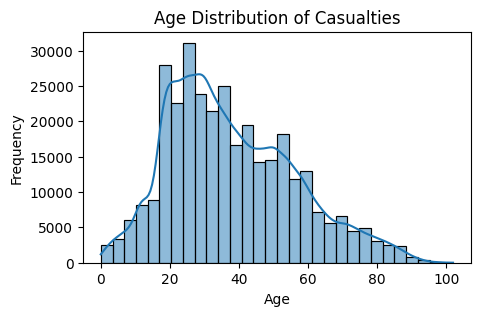

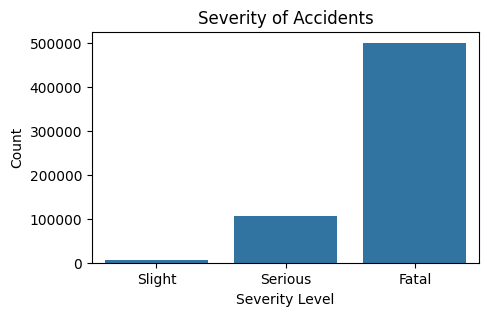

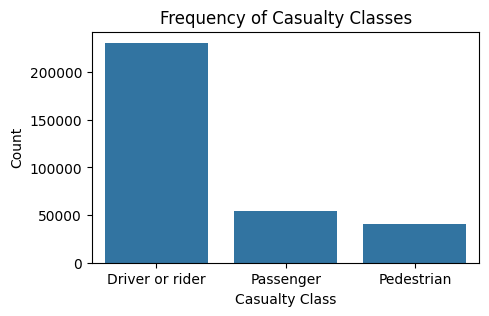

In [11]:
# 1. Age Distribution of Casualties
plt.figure(figsize=(5, 3))
sns.histplot(dataSet.raw['age_of_casualty'], bins=30, kde=True)
plt.title('Age Distribution of Casualties')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Severity of Accidents
plt.figure(figsize=(5, 3))
sns.countplot(x='casualty_severity', data=casualtyDataset.raw)
plt.title('Severity of Accidents')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Slight', 'Serious', 'Fatal'])
plt.show()

# 3. casualty_class
plt.figure(figsize=(5, 3))
sns.countplot(x='casualty_class', data=dataSet.raw)
plt.title('Frequency of Casualty Classes')
plt.xlabel('Casualty Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Driver or rider', 'Passenger', 'Pedestrian'])
plt.show()


Accoridng to first age distribution cahrt, the majority of traffic accident casualties fall within the 20-40 age range, indicating a higher involvement rate of younger to middle-aged adults in traffic accidents. There is a noticeable decline in frequency as age increases beyond 40 years, suggesting a lower involvement.

The number of fatal severity accidents far exceeds those of serious and slight accidents, suggesting a higher occurrence rate of very severe incidents (This dataset contains much more lethal cases).

As for the thrid figure, drivers or riders constitute the highest number of casualties, which may correlate with the larger number of people driving or riding vehicles. Passengers are the second most common casualty class, followed by pedestrians. This could reflect the inherent risk exposure of these groups, with pedestrians being the least exposed but also the most vulnerable.

After a certain understanding of the data set, we can proceed to deeper processing and analysis of the data.

## Data preparation

This part is going to further process the data to benifit the analysis. In logistic regression, the VIF and outlier removal will be applied to the dataset. As for the neural network, unlike linear regression models, are less sensitive to multicollinearity due to their complex nature and ability to model nonlinear relationships. They can capture interactions between input variables in ways that VIF cannot account for. Therefor, the split dataset will only processed by Principal Component Analysis (PCA).

In [12]:
# Remove Null and invalid value
dataSet.clean_na()
dataSet.get_train_test_split()

print(dataSet.shape())

(12383, 28)


After clean the dataset, there are total 12383 rows data that will be used in furtuer analysis.

### Variance Inflation Factors (VIF) removal

The Variance Inflation Factor (VIF) serves as a key diagnostic tool to detect multicollinearity among predictors in regression models. Commonly, VIF values exceeding thresholds such as 10 or 5 signal excessive multicollinearity, prompting researchers to modify their models, potentially by dropping variables or employing ridge regression. However, such thresholds may be overly conservative and can lead to misguided exclusions of significant predictors from the analysis.

Recent scholarly discussions challenge the rigid adherence to these conventional VIF thresholds. O'brien's review (2007) criticizes the mechanical application of these rules, suggesting that such thresholds oversimplify the complexities of model dynamics. Instead, the context in which VIF values arise—alongside factors like sample size, the number of predictors, and inherent model variability—should guide their interpretation. A VIF of 1 means there is no correlation among the 𝑘-th feature and the remaining feature set, and hence, the variance of $ \beta_k $ is not inflated at all.

In [13]:
def calculate_vif(df):
    # Calculating VIF for each independent variable
    vif_data = pd.DataFrame()
    vif_data['feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    print(vif_data)
    return vif_data

def remove_multicollinear_columns(df, vif_threshold=10.0):
    """
    Removes columns from the dataframe df that have a variance inflation factor (VIF) greater than the threshold.
    """
    # Calculate VIF for each feature
    vif_data = calculate_vif(df)
    
    # Find features with VIF exceeding the threshold
    features_to_drop = vif_data[vif_data['VIF'] > vif_threshold]['feature']
    
    # Drop the features from the original dataframe
    df_reduced = df.drop(columns=features_to_drop)
    
    return df_reduced, features_to_drop

def remove_outliers(df, feature_column="labels"):
    # Cretab Isolation Forest object
    clf = IsolationForest(max_samples=100, random_state=2024)

    # Fit to the column (reshape(-1, 1) because the data needs to be 2D for sklearn)
    clf.fit(df[feature_column].values.reshape(-1, 1))

    # Predict if a data point is an outlier
    outliers = clf.predict(df[feature_column].values.reshape(-1, 1)) == -1

    return df[~outliers]

There are too many x-properties that going to be used, combining some of them together may benifit the model to simplify the data and leads to better performance. By observing the columns, the 'casualty_home_area_type' and 'casualty_imd_decile' can be combined as state info of casualty. In a similar way, columns 'pedestarin_crossing_state' was generated.

After applying the property mix and vif removal, we can proceed the logistic regression task.

In [14]:
# merge similar data columns into one singe column
dataSet.raw['casualty_state'] = dataSet.raw['casualty_home_area_type'] * dataSet.raw['casualty_imd_decile']
dataSet.raw['pedestarin_crossing_state'] = dataSet.raw['pedestrian_crossing_human_control'] + dataSet.raw['pedestrian_crossing_physical_facilities']

# remove above used columns
dropColumns = ['casualty_home_area_type', 'casualty_imd_decile', 
               'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities']

# drop
dataSet.raw = dataSet.raw.drop(dropColumns, axis=1)
# re-assign the df back to object
dataSet.reset_raw_data(dataSet.raw, loc_test=['labels'])

# Remove y-axis first
df_raw = dataSet.raw.drop('labels', axis=1)
# convert the data into numeric fromat to ensure the correct process
df_raw = df_raw.apply(pd.to_numeric, errors='coerce')
# get reduced df after appplying VIF remove
df_raw_fited, _ = remove_multicollinear_columns(df_raw, 10)
# add the dropped Y label column back again
df_raw_fited['labels'] = dataSet.raw['labels']
# fit the Isolation Forest algorithm to the specified column and remove the rows that are classified as outliers.
remove_outliers(df_raw_fited)

# copy data set for logistic regression. Use deep copy to create a new compound object
dataSet_logistic = copy.deepcopy(dataSet)
# re-assign the df back to logistic dataset after applying VIF
dataSet_logistic.reset_raw_data(df_raw_fited, loc_test=['labels'])

# check data shape
print(f"Training data shape: {dataSet_logistic.X.shape}")
print(f"Testing data shape: {dataSet_logistic.y.shape}")

display(dataSet_logistic.raw.head(6))

                       feature         VIF
0               casualty_class   16.205190
1              sex_of_casualty    9.487878
2              age_of_casualty  109.051526
3         age_band_of_casualty  223.559719
4          pedestrian_location    4.970332
5          pedestrian_movement    4.799570
6                car_passenger    1.339246
7       bus_or_coach_passenger    1.164591
8           number_of_vehicles   13.767863
9         number_of_casualties    4.362550
10                 day_of_week    5.562628
11            first_road_class   11.977441
12                 speed_limit   16.129751
13             junction_detail    2.492458
14            junction_control    8.260491
15           second_road_class   18.452355
16            light_conditions    2.433905
17          weather_conditions    4.116873
18     road_surface_conditions    4.310155
19  special_conditions_at_site   11.722536
20         carriageway_hazards    3.286148
21         urban_or_rural_area   20.516884
22         

,sex_of_casualty,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,number_of_casualties,day_of_week,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,carriageway_hazards,casualty_state,pedestarin_crossing_state,labels
74,1,0,0,0,0,1,4,1,2,1,1,2,0,3,5,18.0
80,1,0,0,0,0,1,4,1,4,4,1,1,0,1,10,23.0
88,1,0,0,2,0,2,5,6,4,4,2,2,0,7,7,8.0
89,1,0,0,0,0,2,5,6,4,4,2,2,0,8,7,8.0
104,2,0,0,0,0,1,4,99,2,1,8,1,0,2,18,23.0
126,2,0,0,0,0,1,6,3,4,1,1,1,0,10,0,19.0


Counts the occurrences of each class label in the dataset and prints the results, indicating the distribution of the dataset.

labels
23.0    5296
19.0    2740
16.0     900
18.0     680
11.0     594
15.0     431
20.0     337
21.0     292
22.0     226
8.0      177
17.0     174
10.0     159
12.0     144
13.0      87
14.0      53
3.0       38
9.0       31
0.0       11
2.0        6
4.0        3
7.0        3
6.0        1
Name: count, dtype: int64


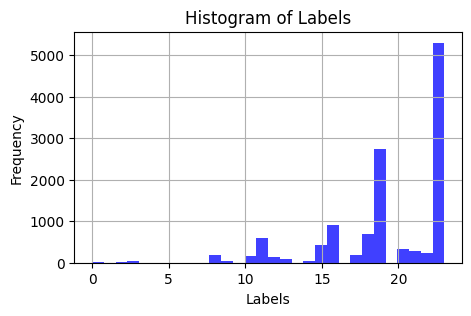

In [15]:
# Count each classes
print(dataSet.raw['labels'].value_counts())
# Plotting a histogram of the 'labels' column to see the distribution of values
plt.figure(figsize=(5, 3))
plt.hist(dataSet.raw['labels'], bins=30, alpha=0.75, color='blue')
plt.title('Histogram of Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

According to previous studies and figure, the distribution of the data set is not uniform, and category 23 holds the majority of the data, which is related to the return of the accident personnel. This may influen the regression result, but he reality of the accident data recorded like this.

## Results

Logistic regression provides not only classification but also the probability of the outcome, which is crucial for risk assessment and understanding the likelihood of different accident severities or special conditions. And  itcan be used for binary outcomes (e.g., severe vs. non-severe accidents) and extended to multiclass classification (e.g., multiple levels of accident severity) through techniques like one-vs-rest (OvR) or multinomial logistic regression (Al-Ghamdi,2002).

Check the assumptions of logistic regression ("Understanding Logistic Regression", 2017):

**Independent Observations**: Each observation is independent of the others. This means that there is no correlation between any of the input variables.

**Binary dependent variable**: It assumes that the dependent variable must be binary, which means it can only take two values. For more than two categories, the SoftMax function is used.

**Linear relationship between** the independent variable and the logarithm: A linear relationship between the independent variable and the logarithm of the dependent variable.

**No outliers**: There should be no outliers in the data set.

The "Limited-memory Broyden-Fletcher-Goldfarb-Shanno" (lbfgs) solver in the LogisticRegression model of Scikit-learn is an optimizer that is particularly well-suited for optimizing logistic regression models, especially for relatively smaller datasets or datasets with a moderate number of features.
'saga' solver is also suitable for large datasets and supports L1 regularization, which is helpfull in a high-dimensional dataset.

To ensure the reliability or the result, KFold method from sklearn.model_selection, which splits the dataset into k consecutive folds, will be used. Each fold is then used once as a validation while the $k-1$ remaining folds form the training set. This process is repeated $k$ times (folds), with each of the $k$ folds used exactly once as the validation data.

In [16]:
# Setup cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=2024)
# Suppress ConvergenceWarnings (It takes too much time to converge, so it's suppressed)
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Instantiate the model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100)
# Save each result for later calculation
scores = []

# Example: Print the indices of the data for each fold
for train_index, test_index in kf.split(dataSet_logistic.X):

    X_train, X_test = dataSet_logistic.X[train_index], dataSet_logistic.X[test_index]
    y_train, y_test = dataSet_logistic.y[train_index], dataSet_logistic.y[test_index]

    # Train the model at each fold
    logreg.fit(X_train, y_train.ravel())

    # Predict on the test set
    y_pred = logreg.predict(X_test)
    # Evaluate the model
    print("Accuracy:", accuracy_score(y_test, y_pred))

    scores.append(accuracy_score(y_test, y_pred))

print(f"The Average  accuracy after 5-k training is: {sum(scores) / len(scores)}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(dataSet_logistic.X, dataSet_logistic.y, test_size=0.2, random_state=2024)
# Get final reg model
final_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100)
final_model.fit(X_train, y_train.ravel())
 # Predict on the test set
y_pred = final_model.predict(X_test)

Accuracy: 0.5805409769882923
Accuracy: 0.595074687121518
Accuracy: 0.5789261203068228
Accuracy: 0.5767366720516963
Accuracy: 0.5892568659127625
The Average  accuracy after 5-k training is: 0.5841070644762184


Given that all the accuracy scores are close to the average, overfitting is not immediately apparent. The accuracy scores are moderate, indicating that the model has a reasonable ability to predict the 'accident_severity' and 'special_conditions_at_site'. However, there's significant room for improvement, such as add more data, balance the number of class (improving the quality of the existing data).

As for the next step, follwoing confusion matrix visualizes the performance of a classification model. Each cell in the grid represents the number of predictions made by the model for a pair of true and predicted labels. 

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         8
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00        31
         7.0       0.00      0.00      0.00         6
         8.0       0.00      0.00      0.00        24
         9.0       0.00      0.00      0.00       120
        10.0       0.00      0.00      0.00        27
        11.0       0.00      0.00      0.00        19
        12.0       0.00      0.00      0.00        13
        13.0       0.00      0.00      0.00        83
        14.0       0.00      0.00      0.00       164
        15.0       0.00      0.00      0.00        29
        16.0       0.00      0.00      0.00       153
        17.0       0.36      0.90      0.52       515
        18.0       0.00      0.00      0.00        84
        19.0       0.00    

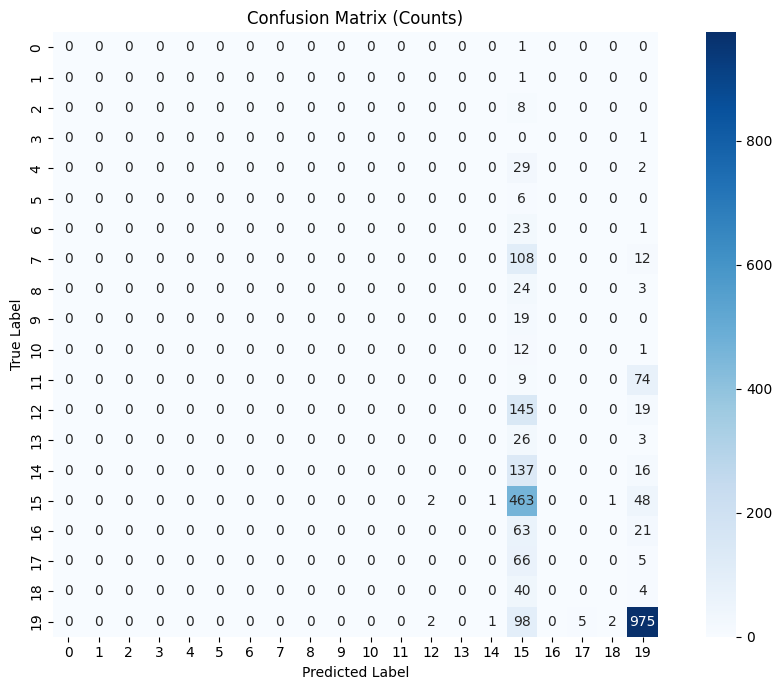

In [17]:
# Get model summary
print(classification_report(y_test, y_pred, zero_division=0))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Normalize the confusion matrix by row (by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the Confusion Matrix
fig, ax = plt.subplots(figsize=(10, 7))  # Adjust the size as needed

# Plot the non-normalized confusion matrix
sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap='Blues', square=True)
ax.set_title('Confusion Matrix (Counts)')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# # Normalized confusion matrix
# sns.heatmap(cm_normalized, annot=True, fmt=".2f", ax=ax[1], cmap='Blues', square=True)
# ax[1].set_title('Normalized Confusion Matrix')
# ax[1].set_xlabel('Predicted Label')
# ax[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

The classification report reveals a disparity across different classes in terms of precision, recall, and F1-score. Classes 17 and 21 achieved high recall rates of 0.90 and 0.90, respectively, and F1-scores of 0.52 and 0.86, suggesting a good balance between precision and recall for these classes. The majority of other classes saw zero scores across precision, recall, and F1-score, highlighting an inability of the model to recognize or predict these classes.

The macro-averaged F1-score was 0.07, which indicates poor performance across classes when treating all classes equally. The weighted average F1-score was higher at 0.48, accounting for class imbalance by giving more weight to classes with more instances.

The confusion matrix (Counts) demonstrates significant class imbalances, with a predominance of instances in classes 17 and 21. High counts along the diagonal for these two classes indicate a strong predictive performance for them. However, many classes (0-16, 18-20) had zero instances correctly predicted, as evidenced by the zeros along the diagonal, suggesting the model did not learn to identify these classes effectively.

The performance analysis suggests that the model is highly class-imbalanced, favoring certain classes significantly over others. This imbalance may have been exacerbated by the model's inability to distinguish between classes with fewer instances, potentially due to either a lack of representative features or insufficient training instances.

### Train test split and PCA for NN

After seeing the results of logistic regresson, next will continue to deal with neural networks.

Spliting a dataset into training and testing sets and then apply Principal Component Analysis (PCA) for dimensionality reduction before feeding the data into a neural network model.

In [18]:
# Data split into training and testing sets with a 7:3 ratio for neural network
train_X, test_X, train_y, test_y = train_test_split(dataSet.X, dataSet.y, test_size=0.3, random_state=2024)

print(f"Training X data shape: {train_X.shape}")
print(f"Testing X data shape: {test_X.shape}")

# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# min(n_samples, n_features)
pca = PCA(n_components=10, svd_solver='auto')   # Reducedprincipal components
train_X = pca.fit_transform(train_X)            # Fit the model with X and apply the dimensionality reduction on X
test_X = pca.transform(test_X)                  # Apply dimensionality reduction to X

Training X data shape: (8668, 25)
Testing X data shape: (3715, 25)


#### The explained variance in PCA

The explained variance in PCA represents the proportion of the total variance attributed (explained) by each principal component. It (Cheng et al., 2022; Chouinard, 2023) helps us understand how much information is retained after dimensionality reduction. It is the portion of the original data’s variability that is captured by each principal component.

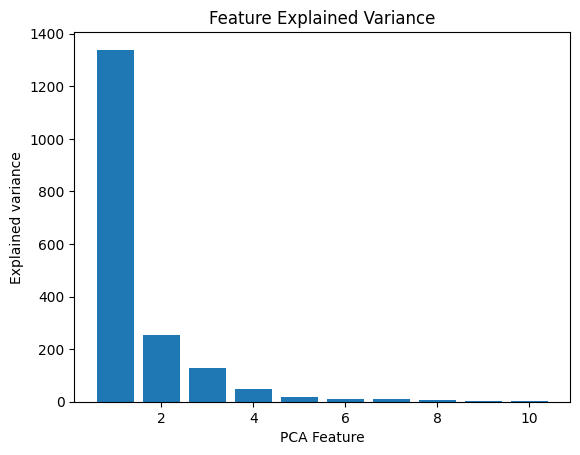

In [19]:
# Code reference from Chouinard (2023): https://www.jcchouinard.com/pca-plot-visualization-python/ 

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )


plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

PCA shows that we do not need 10 features, but only 4. The last 5 feature's variance is obviously not very significant. To visualize the first few important features, a 3D scatter transformed data plus train/test X data will be ploted.

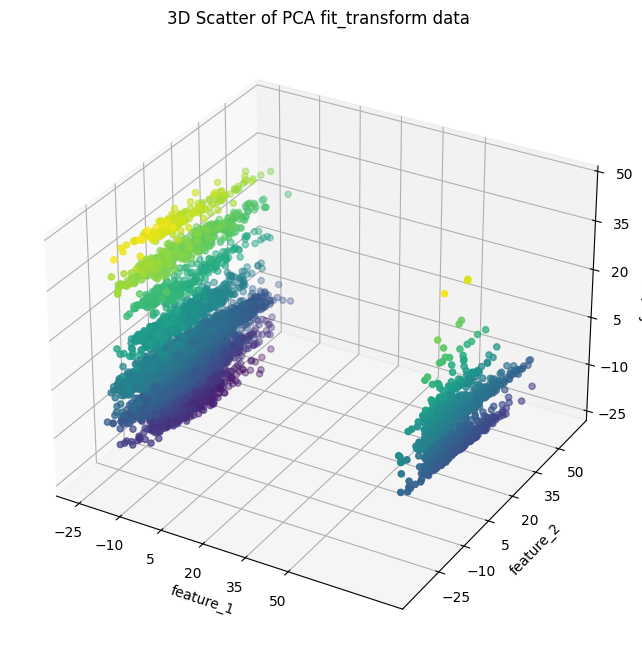

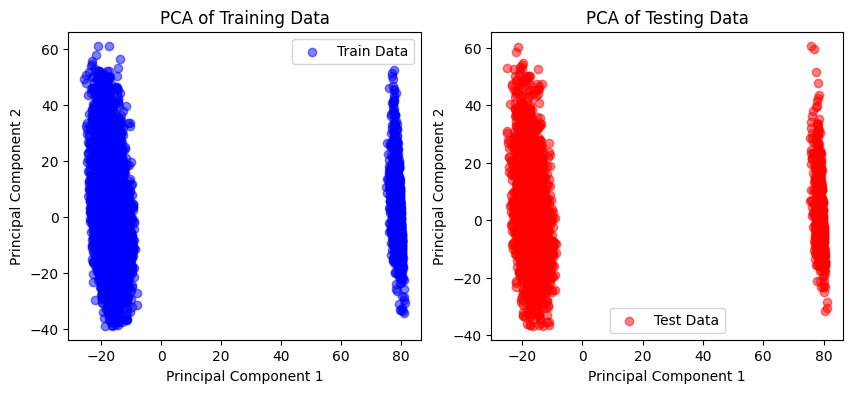

In [20]:
# Prepare 3D graph
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot scaled features
xdata = train_X[:,0]
ydata = train_X[:,1]
zdata = train_X[:,2]

# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# Plot title of graph
plt.title(f'3D Scatter of PCA fit_transform data')

# Plot x, y, z even ticks
ticks = np.linspace(-25, 50, num=6)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)

# Plot x, y, z labels
ax.set_xlabel('feature_1', rotation=150)
ax.set_ylabel('feature_2')
ax.set_zlabel('feature_3', rotation=60)
plt.show()

# ======

# Plot the first two principal components, as they are the ones that capture the most variance.
plt.figure(figsize=(10, 4))

# Scatter plot for training data
plt.subplot(1, 2, 1)
plt.scatter(train_X[:, 0], train_X[:, 1], c='blue', alpha=0.5, label='Train Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Training Data')
plt.legend()

# Scatter plot for testing data
plt.subplot(1, 2, 2)
plt.scatter(test_X[:, 0], test_X[:, 1], c='red', alpha=0.5, label='Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Testing Data')
plt.legend()

plt.show()

First top plot visualizes the transformed dataset in three dimensions, each point in the plot represents a data sample projected onto the first three principal components, which are labeled 'feature_1', 'feature_2', and 'feature_3' on the respective axes.

The second chart of 2D Plots two separate scatter plots for training and testing data, showing the projection of the data onto the first two principal components. And both plots suggest that 'Principal Component 1' contains most of the variance.

The 3D plot indicates that the PCA has managed to capture a gradient of information along the third component (from bottom to top), although most variance seems to be in the plane of the first two components. The clear separation between the values along 'Principal Component 1' indicates that this component is likely the most informative feature derived from PCA. The fact that the training and testing data show a similar distribution in the 2D plots indicates that the PCA model has transformed both datasets consistently, which is crucial for maintaining model performance from training to testing phases.

After pre-processed the dataset, next step is to build neural network where torch.nn will be used in this case.

In [21]:
# Define the neural network models
class Model_1(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Model_1, self).__init__()
        # Initialize a linear layer that maps from the input size to 128 features
        self.layer1 = nn.Linear(input_size, 128)
        # Define the ReLU activation function to be used after linear layers
        self.relu = nn.ReLU()
        # Another linear layer that maps from 128 features to 64 features
        self.layer2 = nn.Linear(128, 64)
        # Output linear layer that maps from 64 features to the number of classes
        self.layer_out = nn.Linear(64, num_classes)
        # No softmax here, CrossEntropyLoss will handle that

    def forward(self, x):
        # Forward propagation through the first layer and ReLU activation
        x = self.relu(self.layer1(x))
        # Forward propagation through the second layer and ReLU activation
        x = self.relu(self.layer2(x))
        # Final layer output without activation, returns logits for CrossEntropyLoss
        x = self.layer_out(x)  # Outputs are logits
        return x
    
class Model_2(nn.Module):
    def __init__(self, input_size, num_classes, dropout_rate=0.5):
        super(Model_2, self).__init__()
        # Initialize a linear layer that maps from the input size to 128 features
        self.layer1 = nn.Linear(input_size, 128)
        # Batch normalization for the first layer to stabilize learning
        self.batch_norm1 = nn.BatchNorm1d(128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.layer2 = nn.Linear(128, 64)
        # Batch normalization for the second layer to further stabilize learning
        self.batch_norm2 = nn.BatchNorm1d(64)
        # Output linear layer same as Model_1, maps to the number of classes
        self.layer_out = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer2(x)
        x = self.batch_norm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        return x

The structure of each model is listed below

| Layer        | Model 1                   | Model 2                                      |
|--------------|---------------------------|----------------------------------------------|
| Input        | `train data size`         | `train data size`                            |
| Layer 1      | `Linear(input_size, 128)` | `Linear(input_size, 128)`                    |
| Activation 1 | `ReLU`                    | `BatchNorm1d(128)` followed by `ReLU`        |
| Dropout      | -                         | `Dropout(dropout_rate)`                      |
| Layer 2      | `Linear(128, 64)`         | `Linear(128, 64)`                            |
| Activation 2 | `ReLU`                    | `BatchNorm1d(64)` followed by `ReLU`         |
| Output Layer | `Linear(64, num_classes)` | `Linear(64, num_classes)`                    |
| Output       | Logits      | Logits         |

First model has two linear layers followed by ReLU activations and a final linear layer for output and there is no softmax activation because the CrossEntropyLoss function in PyTorch expects raw logits.

Accordingt to Doshi (2021), Batch Norm is just another network layer that gets inserted between a hidden layer and the next hidden layer. Its job is to take the outputs from the first hidden layer and normalize them before passing them on as the input of the next hidden layer.

Building on the first model, model 2 introduces Batch Normalization and Dropout layers to enhance performance and generalizability. Batch Normalization ensures more stable and faster training, while Dropout helps the model avoid overfitting by ignoring randomly selected neurons during training. This model is adept at handling the variable and complex nature of traffic accident data, resulting in a more robust classification system.

To realize model training and evaluation, two functions were defined (__torch_training_start__ and __model_eval__) to train and evaluate a neural network model using PyTorch. The __torch_training_start__ function initializes a training process where the model parameters are updated over a number of epochs using a given data loader, loss function, and optimizer. It iterates over each epoch and each batch within the data loader, processing inputs and targets. If the batch size is more than one, it computes the output, evaluates the loss, and performs backpropagation and optimization steps to update the model's weights. Otherwise, it skips the batch. After each epoch, it prints the loss. The __model_eval__ function assesses the trained model's performance on test data by running it in evaluation mode. It calculates and prints the accuracy by comparing the model's predicted classes with the actual labels.

In [22]:
def torch_training_start(model, train_loader, criterion, optimizer, epochs=5):
    """
    Perform the model training process over a specified number of epochs.

    Parameters
    ----------
    model : torch.nn.Module
        The neural network model to be trained.
    train_loader : DataLoader
        The DataLoader containing the training data in batches.
    criterion : loss function
        The loss function to be used for evaluating the performance.
    optimizer : torch.optim
        The optimization algorithm to adjust the model's weights.
    epochs : int, optional
        The number of complete passes through the training dataset. Default is 5.

    Returns
    -------
    None
    """
        
    print("Start training...")
    # Train the model
    for epoch in range(epochs):

        for inputs, targets in train_loader:
            if inputs.size(0) > 1:  # Check if batch size is greater than 1
                inputs, targets = inputs.float(), targets.long()  # Ensure correct types
                outputs = model(inputs)
                loss = criterion(outputs, targets)  # Calculate the loss between model predictions and true targets

                # Perform backpropagation and optimization steps
                optimizer.zero_grad()   # Clear gradients from the previous iteration
                loss.backward()         # Compute the gradients of the loss
                optimizer.step()        # Update model parameters
            else:
                # print("Encountered batch size of 1, skipping...")
                continue
                
        # print current training state    
        print(f"epoch: {epoch}, Loss: {loss.item()}")    

def model_eval(model_loaded, X_test_tensor, y_test_tensor):
    """
    Evaluate the performance of the trained model on test data.

    Parameters
    ----------
    model_loaded : torch.nn.Module
        The neural network model to be evaluated.
    X_test_tensor : torch.Tensor
        The tensor containing the test dataset features.
    y_test_tensor : torch.Tensor
        The tensor containing the true labels of the test dataset.

    Returns
    -------
    None
    """
    model_loaded.eval()
    with torch.no_grad():
        # Generate model predictions for the test set
        outputs = model_loaded(X_test_tensor)
        # Get the class predictions from the highest model outputs
        _, predicted = torch.max(outputs, 1)
        # Calculate the accuracy of predictions
        accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f'Accuracy: {accuracy * 100:.2f}%')

The hyper parameters are defined: __input_size__ derived from the feature count of the training data, __epochs__ count training epoch and __num_classes__ for the classification task, which are 24 unique labels from 0 to 23. The two models have been trained already with given parameters after 50 epochs.

In [23]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(train_X.astype('float32'), dtype=torch.float32)
X_test_tensor = torch.tensor(test_X.astype('float32'), dtype=torch.float32)
y_train_tensor = torch.squeeze(torch.tensor(train_y, dtype=torch.long))
y_test_tensor = torch.squeeze(torch.tensor(test_y, dtype=torch.long))

# Define the dataset and dataloader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

input_size = train_X.shape[1]
print(f"The shape of training data is: {input_size}")
# The number of classes
num_classes = 24        # After observing the unique labes, there are 0-23 total 24 classes
epochs = 50

isTrain = False # Debug option, change to True if want to train the model

if not isTrain:
    print('---Model 1---')
    model_loaded = torch.load('model_1.pth')
    model_eval(model_loaded, X_test_tensor, y_test_tensor)
    print('---Model 2---')
    model_loaded = torch.load('model_2.pth')
    model_eval(model_loaded, X_test_tensor, y_test_tensor)
else:
    model = Model_1(input_size=input_size, num_classes=num_classes)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    torch_training_start(model, train_loader, criterion, optimizer, epochs=epochs)

    model_eval(model, X_test_tensor, y_test_tensor)

    # Make predictions (on unseen data)
    with torch.no_grad():
        sample_data = X_test_tensor[:5]
        sample_preds = model(sample_data)
        _, predicted_classes = torch.max(sample_preds, 1)
    print(f'Predicted classes: {predicted_classes.numpy()}')

    torch.save(model, 'model_1.pth')

The shape of training data is: 10
---Model 1---
Accuracy: 75.83%
---Model 2---
Accuracy: 77.15%


According to the results, Model_1 achieved 75.83%, and Model_2 achieved a slightly higher accuracy of 77.15%. The improved accuracy in Model_2 can be attributed to the inclusion of batch normalization and dropout, which have likely enabled the model to generalize better to unseen data and mitigated the overfitting that could have affected Model_1. Despite the relatively close performance, the architectural enhancements in Model_2 provide a more sophisticated approach to learning, thus offering a slight edge in accuracy.

## Discussion and conclusion

In summary, Logistic regression provided a baseline with its inherent advantages in interpretability and simplicity, especially when dealing with linearly separable data. However, neural networks demonstrated superior performance, capitalizing on their capacity to model complex, nonlinear relationships inherent in high-dimensional traffic data. The results clearly indicate the neural network's ability to outperform logistic regression in multi-class classification tasks, as evidenced by its better handling of non-linearity within the dataset. Notably, the neural network excelled in capturing intricate patterns, leading to improved prediction accuracy.

Reflecting on the process, A significant limitation observed was the class imbalance within the dataset. The skewness in the distribution of the accident severity levels resulted in the logistic model's predilection towards certain classes, reducing its overall generalizability.
For another, even through the  lookup table effectively reduced dimensionality, it might have obscured the distinction between the severity of accidents and special conditions at the site, potentially impacting the interpretive clarity of the results.

To conclude, the research reaffirms the potential of neural networks in traffic accident severity analysis but also underscores the importance of addressing data imbalance and ensuring robust model validation. Future research should consider a more balanced dataset, improved feature engineering, or a different modeling approach that can handle the complexity and distribution of the multi-class classification task. The ultimate goal remains the enhancement of predictive models to support real-time traffic monitoring systems, fostering a proactive approach to road safety management.

## Bibliography

Al-Ghamdi, Ali S. "Using Logistic Regression to Estimate the Influence of Accident Factors on Accident Severity." Accident Analysis & Prevention, vol. 34, no. 6, Nov. 2002, pp. 729-741, https://doi.org/10.1016/s0001-4575(01)00073-2.

Brownlee, Jason. "PyTorch Tutorial: How to Develop Deep Learning Models with Python." Machine Learning Mastery, 22 Mar. 2020, machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/.

Cheng, Jiehong, et al. "A Variable Selection Method Based on Mutual Information and Variance Inflation Factor." Spectrochimica Acta Part A: Molecular and Biomolecular Spectroscopy, vol. 268, Mar. 2022, p. 120652, https://doi.org/10.1016/j.saa.2021.120652.

Chouinard, Jean-Christophe. "The 6 Best PCA Plots & Visualizations with Python (Scikit-Learn Example) - JC Chouinard." JC Chouinard, 10 Nov. 2023, www.jcchouinard.com/pca-plot-visualization-python/. Accessed 21 Apr. 2024.

Heaton, J., 2016, March. An empirical analysis of feature engineering for predictive modeling. In SoutheastCon 2016 (pp. 1-6). IEEE. 

LaValley, M.P., 2008. Logistic regression. Circulation, 117(18), pp.2395-2399. 

"What Is the Explained Variance in PCA (Python Example)." JC Chouinard, 24 Sept. 2023, www.jcchouinard.com/pca-explained-variance/. Accessed 21 Apr. 2024.

Doshi, Ketan. "Batch Norm Explained Visually — How It Works, and Why Neural Networks Need It." Medium, 29 May 2021, towardsdatascience.com/batch-norm-explained-visually-how-it-works-and-why-neural-networks-need-it-b18919692739.

O'brien, Robert M. "A Caution Regarding Rules of Thumb for Variance Inflation Factors." Quality & Quantity, vol. 41, no. 5, 13 Mar. 2007, pp. 673-690.

Shaik, Md. Ebrahim, et al. "A Review on Neural Network Techniques for the Prediction of Road Traffic Accident Severity." Asian Transport Studies, vol. 7, 2021, p. 100040, https://doi.org/10.1016/j.eastsj.2021.100040. Accessed 15 Dec. 2021.

Shiran, Gholamreza, et al. "Crash Severity Analysis of Highways Based on Multinomial Logistic Regression Model, Decision Tree Techniques and Artificial Neural Network: A Modeling Comparison." Sustainability, vol. 13, no. 10, 18 May 2021, p. 5670, https://doi.org/10.3390/su13105670. Accessed 19 May 2021.

"Understanding Logistic Regression." GeeksforGeeks, 9 May 2017, www.geeksforgeeks.org/understanding-logistic-regression/.